In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Sin Signal Class
class SinSample():
    def __init__(self, **kwargs):
        self.amp = kwargs.get('amp',1)
        self.time = kwargs.get('time',t)
        self.freq = kwargs.get('freq',3)
        self.sample = np.sin(2*np.pi*self.freq*self.time)
    
    def calSignal(self, freq):
        return np.sin(2*np.pi*freq*self.time)
    
    def addSample(self, freq):
        self.sample = self.sample + (self.calSignal(freq))

In [3]:
#Init
Fs = 1000#1KHz
Ts = 1/Fs
t = np.arange(0.0, 1.0, Ts)

In [4]:
#Make Signal
Mysample = SinSample(amp=1, time=t, freq=3)
Mysample.addSample(50)
Mysample.addSample(100)

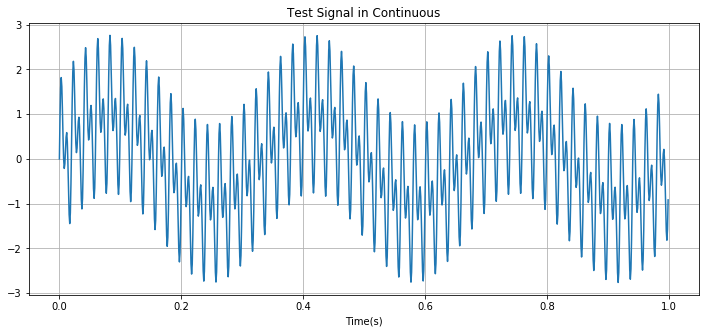

In [5]:
#Plot Signal
plt.figure(figsize=(12,5))
plt.plot(t, Mysample.sample)
plt.xlabel('Time(s)')
plt.title('Test Signal in Continuous')
plt.grid(True)
plt.show()

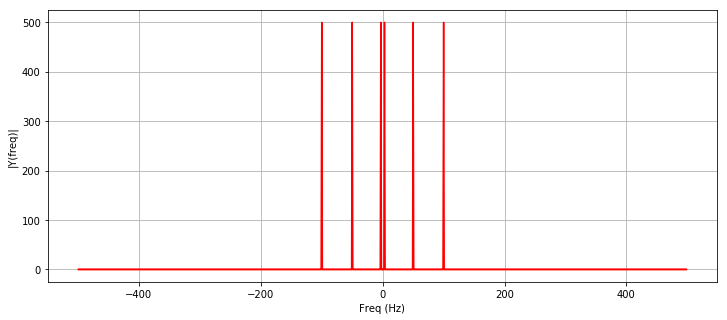

In [26]:
Y = np.fft.fft(Mysample.sample)
freq = np.fft.fftfreq(len(Y), d=Ts)

plt.figure(figsize=(12,5))
plt.plot(freq, np.abs(Y), 'r') 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.grid(True)

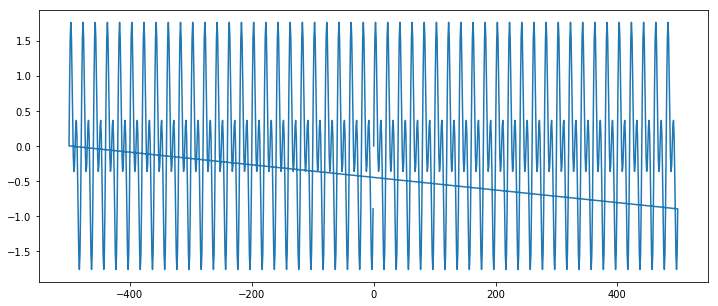

In [27]:
###Delete 3hz signal don't use ifft ==> Error###
#check fft.freq function index -> not continuous
###############################################
Y = np.fft.fft(Mysample.sample)
freq = np.fft.fftfreq(len(Y), d=Ts)

#target hz
fg = 3

for i in range(0, len(Y)):
    Y[i] *= (1 if abs(freq[i]) > fg else 0)
    
filterd_Y = np.fft.ifft(no_shift_Y)
plt.figure(figsize=(12,5))
plt.plot(freq, filterd_Y)

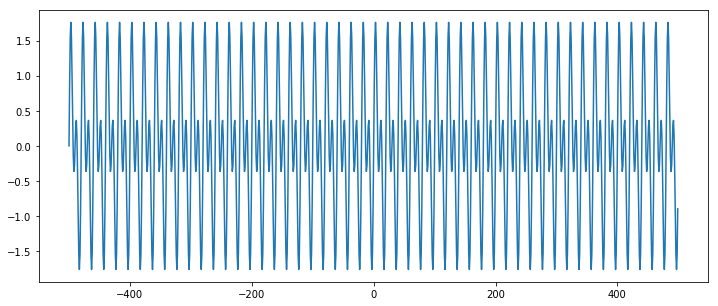

In [31]:
###Delete 3hz signal use ifft###
Y = np.fft.fft(Mysample.sample)
freq = np.fft.fftfreq(len(Y), d=Ts)

#shift x index (freq)
freq = np.fft.fftshift(freq)

#target hz
fg = 3

for i in range(0, len(Y)):
    Y[i] *= (1 if abs(freq[i]) > fg else 0)
    
filterd_Y = np.fft.ifft(no_shift_Y)
plt.figure(figsize=(12,5))
plt.plot(freq, filterd_Y)

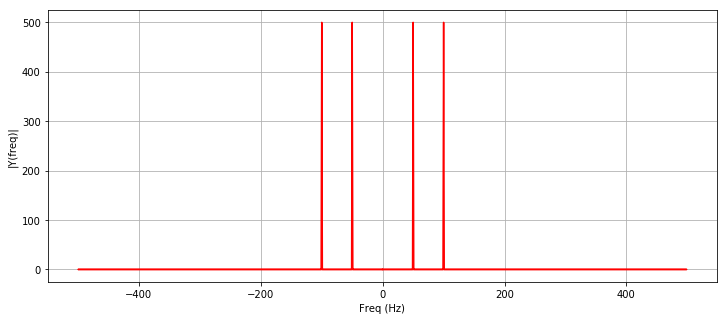

In [32]:
###Get FTT & Plot###
Y = np.fft.fft(filterd_Y)
freq = np.fft.fftfreq(len(f_Y), d=Ts)
plt.figure(figsize=(12,5))
plt.plot(freq, np.abs(f_Y), 'r') 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.grid(True)